In [2]:
import pandas as pd

In [5]:
df=pd.read_csv("Downloads/Agent1Data.csv")
df

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME
0,A1,1,1,True,0.037111
1,A1,2,1,True,0.029949
2,A1,3,1,True,0.079239
3,A1,4,1,True,0.025487
4,A1,5,1,True,0.026131
...,...,...,...,...,...
2995,A1,26,100,False,0.137364
2996,A1,27,100,False,0.015919
2997,A1,28,100,False,0.054224
2998,A1,29,100,False,0.043503


In [6]:
Agent = df['AGENT'].iat[0]
Agent

'A1'

In [7]:
DF=df["NO OF GHOSTS"].value_counts().to_frame().sort_index()
DF = DF.rename({'NO OF GHOSTS':'COUNT'}, axis=1)
DF.reset_index(inplace=True)
DF = DF.rename(columns = {'index':'NO OF GHOSTS'})
DF

,NO OF GHOSTS,COUNT
0,1,30
1,2,30
2,3,30
3,4,30
4,5,30
...,...,...
95,96,30
96,97,30
97,98,30
98,99,30


In [8]:
DF.columns

Index(['NO OF GHOSTS', 'COUNT'], dtype='object')

In [9]:
DF1 = pd.merge(df,DF,on ='NO OF GHOSTS',how ='left')
DF1

,AGENT,ITERATION,NO OF GHOSTS,RESULT,TIME,COUNT
0,A1,1,1,True,0.037111,30
1,A1,2,1,True,0.029949,30
2,A1,3,1,True,0.079239,30
3,A1,4,1,True,0.025487,30
4,A1,5,1,True,0.026131,30
...,...,...,...,...,...,...
2995,A1,26,100,False,0.137364,30
2996,A1,27,100,False,0.015919,30
2997,A1,28,100,False,0.054224,30
2998,A1,29,100,False,0.043503,30


In [10]:
NOFT= df.groupby(["NO OF GHOSTS", "RESULT"]).size().to_frame()
NOFT

0
NO OF GHOSTS RESULT    
1            True    30
2            False    1
             True    29
3            False    2
             True    28
...                  ..
98           True     2
99           False   29
             True     1
100          False   28
             True     2

[195 rows x 1 columns]

In [11]:
NOFT.reset_index(inplace=True)
NOFT = NOFT.rename({0:'SUCCESSCOUNT'}, axis=1)
NOFT

,NO OF GHOSTS,RESULT,SUCCESSCOUNT
0,1,True,30
1,2,False,1
2,2,True,29
3,3,False,2
4,3,True,28
...,...,...,...
190,98,True,2
191,99,False,29
192,99,True,1
193,100,False,28


In [12]:
FinalDf=pd.merge(NOFT, 
                      DF, 
                      on =['NO OF GHOSTS'], 
                      how ='left')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT
0,1,True,30,30
1,2,False,1,30
2,2,True,29,30
3,3,False,2,30
4,3,True,28,30
...,...,...,...,...
190,98,True,2,30
191,99,False,29,30
192,99,True,1,30
193,100,False,28,30


In [13]:
FinalDf["Surv"]=FinalDf["SUCCESSCOUNT"]/FinalDf["COUNT"]
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Surv
0,1,True,30,30,1.000000
1,2,False,1,30,0.033333
2,2,True,29,30,0.966667
3,3,False,2,30,0.066667
4,3,True,28,30,0.933333
...,...,...,...,...,...
190,98,True,2,30,0.066667
191,99,False,29,30,0.966667
192,99,True,1,30,0.033333
193,100,False,28,30,0.933333


In [14]:
FinalDf=FinalDf.query('RESULT != False')
FinalDf

,NO OF GHOSTS,RESULT,SUCCESSCOUNT,COUNT,Surv
0,1,True,30,30,1.000000
2,2,True,29,30,0.966667
4,3,True,28,30,0.933333
6,4,True,26,30,0.866667
8,5,True,24,30,0.800000
...,...,...,...,...,...
185,95,True,1,30,0.033333
187,96,True,2,30,0.066667
190,98,True,2,30,0.066667
192,99,True,1,30,0.033333


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 1.0)

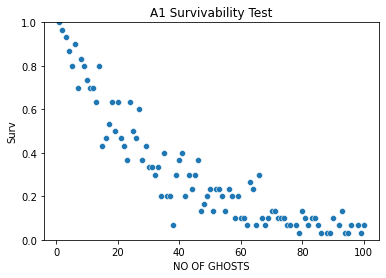

In [16]:
graph=sns.scatterplot(x="NO OF GHOSTS", y="Surv", data=FinalDf).set(title=Agent+" Survivability Test")
plt.ylim(0, 1)

In [17]:
Timedf=df.groupby(["NO OF GHOSTS","RESULT"], as_index=False)['TIME'].mean()
Timedf=Timedf.query('RESULT != False')
Timedf

,NO OF GHOSTS,RESULT,TIME
0,1,True,0.052916
2,2,True,0.026231
4,3,True,0.024979
6,4,True,0.027316
8,5,True,0.027354
...,...,...,...
185,95,True,0.480410
187,96,True,0.395342
190,98,True,0.466771
192,99,True,0.357246


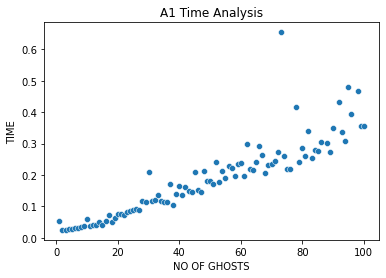

In [18]:
graphtime=sns.scatterplot(x="NO OF GHOSTS", y="TIME", data=Timedf).set(title=Agent+" Time Analysis")